# Data Science
#### By: Javier Orduz
[license-badge]: https://img.shields.io/badge/License-CC-orange
[license]: https://creativecommons.org/licenses/by-nc-sa/3.0/deed.en

[![CC License][license-badge]][license]  [![DS](https://img.shields.io/badge/downloads-DS-green)](https://github.com/Earlham-College/DS_Fall_2022)  [![Github](https://img.shields.io/badge/jaorduz-repos-blue)](https://github.com/jaorduz/)  ![Follow @jaorduc](https://img.shields.io/twitter/follow/jaorduc?label=follow&logo=twitter&logoColor=lkj&style=plastic)


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

# Part I: Simpler Linear Regression. Knowing data

Data source [0].

<h1>Table of contents</h1>

<div class="alert  alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#unData">Data</a></li>
         <ol>
             <li><a href="#reData">Reading</a></li>
             <li><a href="#exData">Exploration</a></li>
         </ol>
        <li><a href="#daExploration">Data Exploration</a></li>
        <li><a href="#simRegression">Simple Regression Model</a></li>
    </ol>
</div>
<br>
<hr>


<h2 id="unData">Data</h2>

### `titanic3.csv`:

This dataset contains a model-specific fuel consumption ratings and estimated carbon dioxide 
emissions for new light-duty vehicles for retail sale in Canada.

Some **features** are

- **survived** e.g. 1 or 0


In [4]:
df = pd.read_csv("titanic3.csv")

In [5]:
df.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [6]:
df.shape

(1309, 14)

In [7]:
print("Number of rows =", df.shape[0], "\nNumber of features (columns) =",df.shape[1])

Number of rows = 1309 
Number of features (columns) = 14


In [8]:
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [9]:
type(df)

pandas.core.frame.DataFrame

In [10]:
df.head(7)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E12,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY"


In [11]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


## Querying

Note, pandas considers a table (dataframe) as a pasting of many "series" together, horizontally.

In [12]:
type(df.survived), type(df)

(pandas.core.series.Series, pandas.core.frame.DataFrame)

In [13]:
df.survived == 1

0        True
1        True
2       False
3       False
4       False
        ...  
1304    False
1305    False
1306    False
1307    False
1308    False
Name: survived, Length: 1309, dtype: bool

In [14]:
from statistics import median
from statistics import mean
def statistics(n):
    for i in range(len(n)):
        values =[]
        average = n[i].sum()/n[i].count()
        values.append(average)
        values.append(n[i].mean())
        values.append(n[i].median())
        values.append(n[i].sum())
        values.append(n[i].min())
        values.append(n[i].max())
        values.append(n[i].count())
        print(values)
        print('\n')
statistics([df.age,df.fare,df.body,df.pclass])

[29.881137667304014, 29.881137667304014, 28.0, 31255.67, 0.17, 80.0, 1046]


[33.29547928134557, 33.29547928134557, 14.4542, 43550.4869, 0.0, 512.3292, 1308]


[160.8099173553719, 160.8099173553719, 155.0, 19458.0, 1.0, 328.0, 121]


[2.294881588999236, 2.294881588999236, 3.0, 3004, 1, 3, 1309]




/mounts/bowie/software/anaconda3/envs/py39/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


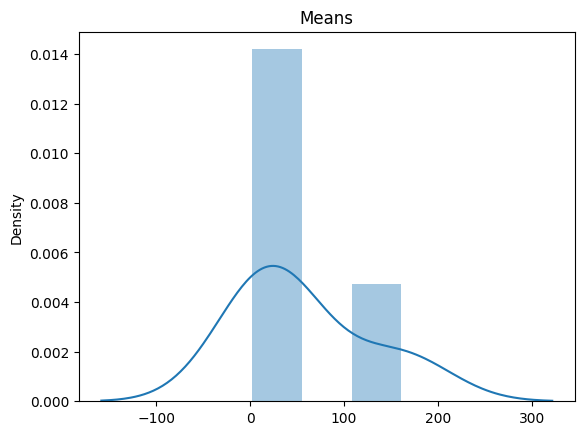

In [16]:
import seaborn as sns
#means of df.age,df.fare,df.body,df.pclass
sns.distplot([29.881137667304014,33.29547928134557,160.8099173553719,2.294881588999236]
).set(title='Means')
plt.show()

## You should implement similar NB to DataScience_7_LinReg.ipynb
## Exercises should be different.

##  Exercises

1. Use at least four more features and calculate: average, mean, median, sum, and implement at least three more statistics functions. Check the ```numpy``` documentation. Different to previous implementations.
1. Implement a new different Library, such as ```seaborn```
1. Submmit your report in Moodle. Template https://www.overleaf.com/read/xqcnnnrsspcp

## Versions

In [ ]:
from platform import python_version
print("python version: ", python_version())
!pip3 freeze | grep qiskit

# References

[0] data https://tinyurl.com/2m3vr2xp

[1] numpy https://numpy.org/

[2] scipy https://docs.scipy.org/

[3] matplotlib https://matplotlib.org/

[4] matplotlib.cm https://matplotlib.org/stable/api/cm_api.html

[5] matplotlib.pyplot https://matplotlib.org/stable/api/pyplot_summary.html

[6] pandas https://pandas.pydata.org/docs/

[7] seaborn https://seaborn.pydata.org/
